In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='Count'>

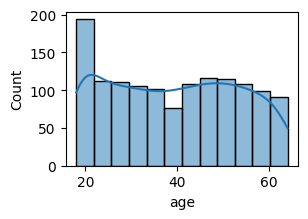

In [55]:
plt.figure(figsize=(3,2))
sns.histplot(df['age'], kde=True)

<Axes: ylabel='age'>

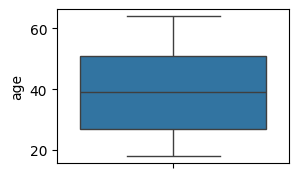

In [56]:
plt.figure(figsize=(3,2))
sns.boxplot(df['age'])

<Axes: xlabel='bmi', ylabel='Count'>

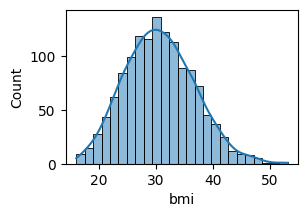

In [57]:
plt.figure(figsize=(3,2))
sns.histplot(df['bmi'], kde=True)

<Axes: ylabel='bmi'>

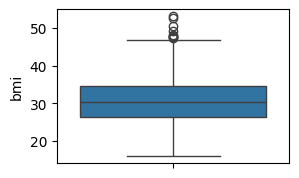

In [58]:
plt.figure(figsize=(3,2))
sns.boxplot(df['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

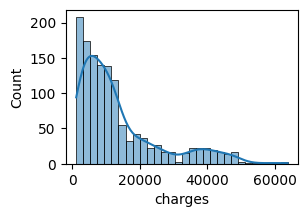

In [59]:
plt.figure(figsize=(3,2))
sns.histplot(df['charges'], kde=True)

<Axes: ylabel='charges'>

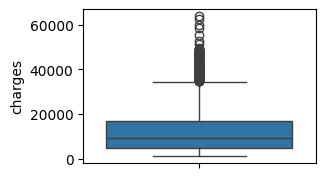

In [60]:
plt.figure(figsize=(3,2))
sns.boxplot(df['charges'])

<Axes: >

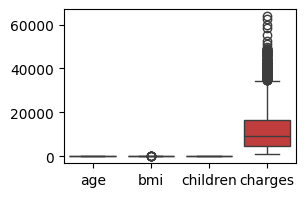

In [61]:
plt.figure(figsize=(3,2))
sns.boxplot(df)

<Axes: ylabel='children'>

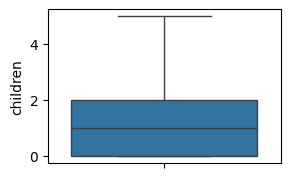

In [62]:
plt.figure(figsize=(3,2))
sns.boxplot(df['children'])

In [63]:
#z score for bmi
mean_val_bmi = df['bmi'].mean()
mean_val_bmi

np.float64(30.66339686098655)

In [64]:
std_val_bmi = df['bmi'].std()
std_val_bmi

np.float64(6.098186911679014)

In [65]:
df['pred_Z_bmi'] = (df['bmi'] - mean_val_bmi) / std_val_bmi

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447


In [67]:
df[df['pred_Z_bmi'] > 3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi
116,58,male,49.06,0,no,southeast,11381.3254,3.016733
847,23,male,50.38,1,no,southeast,2438.0552,3.233191
1047,22,male,52.58,1,yes,southeast,44501.3982,3.593954
1317,18,male,53.13,0,no,southeast,1163.4627,3.684145


In [68]:
df[df['pred_Z_bmi']<-3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi


In [69]:
df1 = df[(df['pred_Z_bmi'] <= 3) & (df['pred_Z_bmi'] >= -3)]

In [70]:
print(df.shape, df1.shape)

(1338, 8) (1334, 8)


<Axes: ylabel='bmi'>

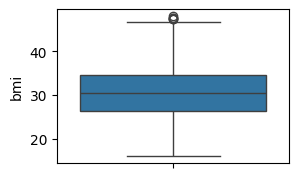

In [71]:
plt.figure(figsize=(3,2))
sns.boxplot(df1['bmi'])

<Axes: ylabel='pred_Z_bmi'>

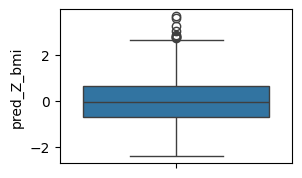

In [72]:
plt.figure(figsize=(3,2))
sns.boxplot(df['pred_Z_bmi'])

In [73]:
#z score for charges
mean_val_c = df['charges'].mean()
mean_val_c

np.float64(13270.422265141257)

In [74]:
std_val_c = df['charges'].std()
std_val_c

np.float64(12110.011236694001)

In [75]:
df['pred_z_c'] = (df['charges'] - mean_val_c) / std_val_c

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi,pred_z_c
0,19,female,27.900,0,yes,southwest,16884.92400,-0.453151,0.298472
1,18,male,33.770,1,no,southeast,1725.55230,0.509431,-0.953333
2,28,male,33.000,3,no,southeast,4449.46200,0.383164,-0.728402
3,33,male,22.705,0,no,northwest,21984.47061,-1.305043,0.719574
4,32,male,28.880,0,no,northwest,3866.85520,-0.292447,-0.776512


In [77]:
df[df['pred_z_c'] > 3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi,pred_z_c
34,28,male,36.400,1,yes,southwest,51194.55914,0.940706,3.131635
543,54,female,47.410,0,yes,southeast,63770.42801,2.746161,4.170104
577,31,female,38.095,1,yes,northeast,58571.07448,1.218658,3.740761
819,33,female,35.530,0,yes,northwest,55135.40209,0.798041,3.457055
1146,60,male,32.800,0,yes,southwest,52590.82939,0.350367,3.246934
1230,52,male,34.485,3,yes,northwest,60021.39897,0.626679,3.860523
1300,45,male,30.360,0,yes,southeast,62592.87309,-0.049752,4.072866


In [78]:
df[df['pred_z_c'] < -3]

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi,pred_z_c


In [79]:
df1 = df[(df['pred_z_c'] <= 3) & (df['pred_z_c'] >= -3)]

In [80]:
print(df1.shape, df.shape)

(1331, 9) (1338, 9)


<Axes: ylabel='charges'>

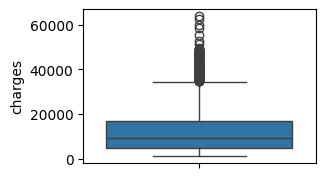

In [81]:
plt.figure(figsize=(3,2))
sns.boxplot(df['charges'])

In [82]:
#std find out
df.head(2)

,age,sex,bmi,children,smoker,region,charges,pred_Z_bmi,pred_z_c
0,19,female,27.90,0,yes,southwest,16884.9240,-0.453151,0.298472
1,18,male,33.77,1,no,southeast,1725.5523,0.509431,-0.953333


In [83]:
df = df.drop(['pred_Z_bmi'], axis=1)

In [84]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges,pred_z_c
0,19,female,27.9,0,yes,southwest,16884.924,0.298472


In [85]:
me_val_bmi = df['bmi'].mean()
st_val_bmi = df['bmi'].std()

In [86]:
pos = me_val_bmi + 3 * st_val_bmi
neg = me_val_bmi - 3 * st_val_bmi

In [87]:
print(pos, neg)

48.95795759602359 12.368836125949507


In [88]:
df[df['bmi'] > pos]

,age,sex,bmi,children,smoker,region,charges,pred_z_c
116,58,male,49.06,0,no,southeast,11381.3254,-0.155995
847,23,male,50.38,1,no,southeast,2438.0552,-0.894497
1047,22,male,52.58,1,yes,southeast,44501.3982,2.578939
1317,18,male,53.13,0,no,southeast,1163.4627,-0.999748


In [89]:
df[df['bmi'] < neg]

,age,sex,bmi,children,smoker,region,charges,pred_z_c


In [90]:
df[(df['bmi'] > pos) | (df['bmi'] < neg)]

,age,sex,bmi,children,smoker,region,charges,pred_z_c
116,58,male,49.06,0,no,southeast,11381.3254,-0.155995
847,23,male,50.38,1,no,southeast,2438.0552,-0.894497
1047,22,male,52.58,1,yes,southeast,44501.3982,2.578939
1317,18,male,53.13,0,no,southeast,1163.4627,-0.999748


In [91]:
df2 = df[(df['bmi'] <= pos) & (df['bmi'] >= neg)]

<Axes: ylabel='bmi'>

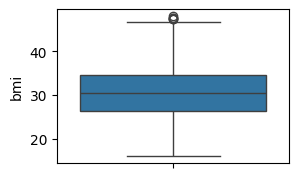

In [92]:
plt.figure(figsize=(3,2))
sns.boxplot(df2['bmi'])

In [103]:
#std find out for charges
df.head(1)

,age,sex,bmi,children,smoker,region,charges,pred_z_c
0,19,female,27.9,0,yes,southwest,16884.924,0.298472


In [104]:
df = df.drop(['pred_z_c'], axis=1)

In [105]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [107]:
me_val_c = df['charges'].mean()
st_val_c = df['charges'].std()

In [108]:
pos_c = me_val_c + 3 * st_val_c
neg_c = me_val_c - 3 * st_val_c

In [109]:
df[df['charges'] > pos_c]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [110]:
df[df['charges'] < neg_c]

,age,sex,bmi,children,smoker,region,charges


In [113]:
df4 = df[(df['charges'] <= pos_c) & (df['charges'] >= neg_c)]

In [ ]:
plt.fig

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
#boxplot
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)

In [94]:
print(q1, q3)

26.29625 34.69375


In [95]:
iqr = q3 - q1
iqr

np.float64(8.3975)

In [96]:
low_whisker = q1 - 1.5 * iqr
low_whisker

np.float64(13.7)

In [97]:
up_whisker = q3 + 1.5 * iqr
up_whisker

np.float64(47.290000000000006)

In [98]:
def outlier(df, col):
    q1 = df['bmi'].quantile(.25)
    q3 = df['bmi'].quantile(.75)

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return df[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)]

In [99]:
df3 = outlier(df, "bmi")

In [100]:
print(df.shape, df3.shape)

(1338, 8) (1329, 8)


<Axes: ylabel='bmi'>

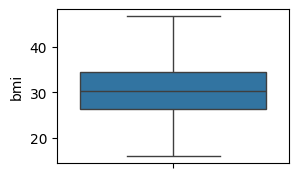

In [101]:
plt.figure(figsize=(3,2))
sns.boxplot(df3['bmi'])